In [ ]:
import numpy as np                     # Math
import matplotlib.pyplot as plt        # Plot
import sklearn                         # Sklearn
from sklearn import preprocessing      # Preprocessing
import sklearn.model_selection as cv   # Cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # split
import sklearn.neighbors as nb         # KNN
import pandas as pd                    # Pandas
from sklearn.decomposition import PCA
%matplotlib inline

Read CSV

In [ ]:
df = pd.read_csv("preprocessed_mean.csv");
df = pd.get_dummies(df, columns=["mode","key"])

targetCol = 'music_genre';
Y = df[targetCol]
X = df.drop([targetCol],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, stratify=Y, random_state=33)

Normalize the data

In [ ]:
scaler = preprocessing.Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Baseline as default

In [ ]:
knn = nb.KNeighborsClassifier();
knn.fit(X_train,Y_train);
pred = knn.predict(X_test);
print(sklearn.metrics.confusion_matrix(Y_test,pred));
print(sklearn.metrics.accuracy_score(Y_test,pred));
cvacc = cross_val_score(nb.KNeighborsClassifier(), X=X_train,  y=Y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())
print('Std. 10-fold cross on train data= ', cvacc.std())

[[1290  170   17   23]
 [ 104 1142  153  101]
 [  10  139  784  567]
 [  19  141  606  734]]
0.6583333333333333
Acc. 10-fold cross on train data=  0.6586428571428571
Std. 10-fold cross on train data=  0.013763490599022741


Grid search to find best parameters

In [ ]:
params = {'n_neighbors': [x for x in range(5,100,1)], 'weights': ['distance','uniform'], 'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

kne = nb.KNeighborsClassifier(p=3,n_jobs=-1)
gknn = GridSearchCV(kne, params, cv=10, n_jobs=-1)
gknn.fit(X_train,Y_train)
score = gknn.score(X_test, Y_test)
print(score)
print(gknn.best_params_)

0.7123333333333334
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


In [ ]:
knn = nb.KNeighborsClassifier(metric= 'manhattan', n_neighbors= 20, weights='distance');
knn.fit(X_train,Y_train);
pred = knn.predict(X_test);
print(sklearn.metrics.confusion_matrix(Y_test,pred));
print(sklearn.metrics.accuracy_score(Y_test,pred));
cvacc = cross_val_score(nb.KNeighborsClassifier(), X=X_train,  y=Y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())
print('Std. 10-fold cross on train data= ', cvacc.std())

[[1283  164   22   31]
 [  65 1146  141  148]
 [   3   90  910  497]
 [   5   80  480  935]]
0.7123333333333334
Acc. 10-fold cross on train data=  0.6586428571428571
Std. 10-fold cross on train data=  0.013763490599022741


In [ ]:
print(sklearn.metrics.classification_report(Y_test,pred))

              precision    recall  f1-score   support

   Classical       0.95      0.86      0.90      1500
  Electronic       0.77      0.76      0.77      1500
     Hip-Hop       0.59      0.61      0.60      1500
        Rock       0.58      0.62      0.60      1500

    accuracy                           0.71      6000
   macro avg       0.72      0.71      0.72      6000
weighted avg       0.72      0.71      0.72      6000



PCA dimensionality reduction

In [ ]:
scores = list()
for dim in range(1,26,1):
    pca = PCA(n_components=dim)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    params = {'n_neighbors': [x for x in range(5,100,1)], 'weights': ['distance','uniform'], 'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
    kne = nb.KNeighborsClassifier(p=3,n_jobs=-1)
    gknn = GridSearchCV(kne, params, cv=10, n_jobs=-1)
    gknn.fit(X_train_pca,Y_train)
    score = gknn.score(X_test_pca, Y_test)
    scores.append(score)
    print(dim,"- ",score)

1 -  0.31883333333333336
2 -  0.518
3 -  0.6508333333333334
4 -  0.6686666666666666
5 -  0.6743333333333333
6 -  0.6751666666666667
7 -  0.6758333333333333
8 -  0.6763333333333333
9 -  0.6791666666666667
10 -  0.6806666666666666
11 -  0.6823333333333333
12 -  0.6788333333333333
13 -  0.681
14 -  0.6821666666666667
15 -  0.6841666666666667
16 -  0.6816666666666666
17 -  0.6875
18 -  0.6885
19 -  0.6888333333333333
20 -  0.6981666666666667
21 -  0.7015
22 -  0.7056666666666667
23 -  0.694
24 -  0.7015
25 -  0.7015


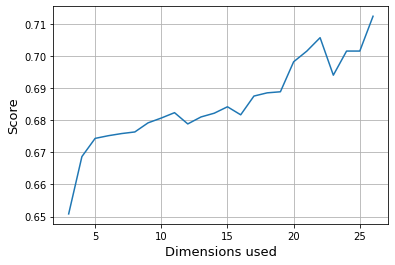

In [ ]:
plt.ylabel('Score',fontsize=13);
plt.xlabel('Dimensions used',fontsize=13);
xvalues = range(1,27,1)
plt.plot(xvalues,scores)
plt.grid()
plt.savefig('knn.png',bbox_inches='tight')
plt.show()